In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

## 3950 Assignment 1: Part 2

For this assignment we want to use some sort of tree based model to classify the data below. We have a very small training set, so overfitting is a very real concern. 

Some specifics for this assignment:
<ul>
<li>Please use the show_eda to control if EDA stuff is shown. I don't really need to see all the EDA stuff (nor do you after you've done it), so we can make it configurable with a variable to speed up time. Please set this FALSE when you submit, so I can run all and see the outcome without histograms etc...
<li>Please ensure that whatever model you end up with is in a variable named best at the end.
<li>Please use some pipeline in prepping the data. The test data is in an identical format to the training data, so whatever pipeline you've created for your training will work for the testing. 
<li>The accuracy scoring will be an average of accuracy and roc_auc. 
</ul>

### Grading Metrics
<ul>
<li><b>Pipeline Used - 10pts</b> The data loading needs to be in a pipeline. See the test part for illustration. When testing I'll call your pipe with the new data (format is identical to training), so any prep stuff should be in the pipeline. 
<li><b>Tree Based Model Used - 5pts</b> The model used for classification needs to be some variety of tree, beyond that it is up to you. 
<li><b>Accuracy - 5pts</b> The final accuracy acheived. This will be a rough ranking, I'm assuming most people will get a similar level of accuracy, marks will only be deducted if yours is far wosrse, as that's an indication that you probably didn't take any/many steps to improve things. 
<li><b>Clarity and Formatting - 5pts</b> Is it organized and can I read it?
    <ul>
    <li> <b>Note:</b> for this assignment, and in general, please get rid of my comments and replace them with your own. I'm going to read this, so all of these instructions aren't really required. Think of this as a template, get rid of the stuff that isn't needed, and leave only the things you need to explain your code. 
    </ul>
</ul>

For submission, please drop the URL for your repository in the dropbox.

In [2]:
#Please change to your name.
name = "Jean Encenarial"

#Please use this to control EDA. 
show_eda = False

In [3]:
#Load data
df = pd.read_csv("training.csv")
df = df.drop(columns={"id"})
df.sample(5)

,target,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
40,1,0.699,0.086,0.202,0.962,0.543,0.652,0.455,0.592,0.733,...,0.333,0.991,0.939,0.767,0.952,0.333,0.566,0.174,0.122,0.901
35,1,0.842,0.339,0.893,0.036,0.378,0.477,0.485,0.485,0.602,...,0.457,0.930,0.684,0.340,0.308,0.536,0.638,0.414,0.530,0.785
155,1,0.208,0.160,0.677,0.947,0.860,0.389,0.685,0.086,0.202,...,0.559,0.949,0.656,0.341,0.550,0.073,0.241,0.959,0.828,0.090
18,0,0.933,0.985,0.695,0.905,0.445,0.751,0.741,0.986,0.799,...,0.866,0.987,0.166,0.440,0.872,0.744,0.815,0.980,0.034,0.164
101,0,0.596,0.737,0.714,0.523,0.064,0.973,0.344,0.875,0.535,...,0.119,0.879,0.033,0.705,0.979,0.223,0.476,0.200,0.266,0.292


In [4]:
# Doing a quick EDA and making all variables into number values
import ml_utils
df_eda = ml_utils.edaDF(df,"target")
print(df_eda.giveTarget())
#there is no variable that is categorical. so just using column numbers
df_eda.setNum(df[1:202])
df_eda.fullEDA()

target


### Starting

For this assignment, you have a small training set, so combatting overfitting is key in being accurate!

In [4]:
df.shape

(250, 201)

var_50     0.113208
var_199    0.089301
var_143    0.080212
var_139    0.076876
var_70     0.070405
dtype: float64

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline

df2 = pd.get_dummies(df, drop_first=True)
y = np.array(df2["target"]).reshape(-1,1)
x = np.array(df2.drop(columns={"target"}))

In [15]:
#Creating a base model and try to improve esting accuracy
df2 = pd.get_dummies(df, drop_first=True)
y = np.array(df2["target"]).reshape(-1,1)
X = np.array(df2.drop(columns={"target"}))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)
print(clf.get_depth())
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))

6
Training Accuracy: 1.0
Testing Accuracy: 0.5079365079365079


In [28]:
#Tree with entropy
clf1 = DecisionTreeClassifier(criterion="entropy")
clf1 = clf1.fit(X_train, y_train)

print(clf1.get_depth())
print("Training Accuracy:", clf1.score(X_train, y_train))
print("Testing Accuracy:", clf1.score(X_test, y_test))
"""
    Seeing how the one argument has already increased accuracy, 
    insteady of measuring the qulaity of a split with 'gini', 
    better to use 'entropy'.
"""

7
Training Accuracy: 1.0
Testing Accuracy: 0.6190476190476191


"\n    Seeing how the one argument has already increased accuracy, \n    insteady of measuring the qulaity of a split with 'gini', \n    better to use 'entropy'.\n"

In [36]:
# How about prune?
clf2 = DecisionTreeClassifier(max_depth=7)
clf2 = clf2.fit(X_train, y_train)

print(clf2.get_depth())
print("Training Accuracy:", clf2.score(X_train, y_train))
print("Testing Accuracy:", clf2.score(X_test, y_test))
"""
Through some different test, looks like depth of 6 is the max for this model
"""

6
Training Accuracy: 1.0
Testing Accuracy: 0.5714285714285714


'\nThrough some different test, looks like depth of 6 is the max for this model\n'

In [49]:
#What happens when you combine the 2?
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=8)
clf3 = clf3.fit(X_train, y_train)

print(clf3.get_depth())
print("Training Accuracy:", clf3.score(X_train, y_train))
print("Testing Accuracy:", clf3.score(X_test, y_test))

#interesting to see that the max_depth changes, so 8 seems like a good fit!

8
Training Accuracy: 1.0
Testing Accuracy: 0.6507936507936508


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

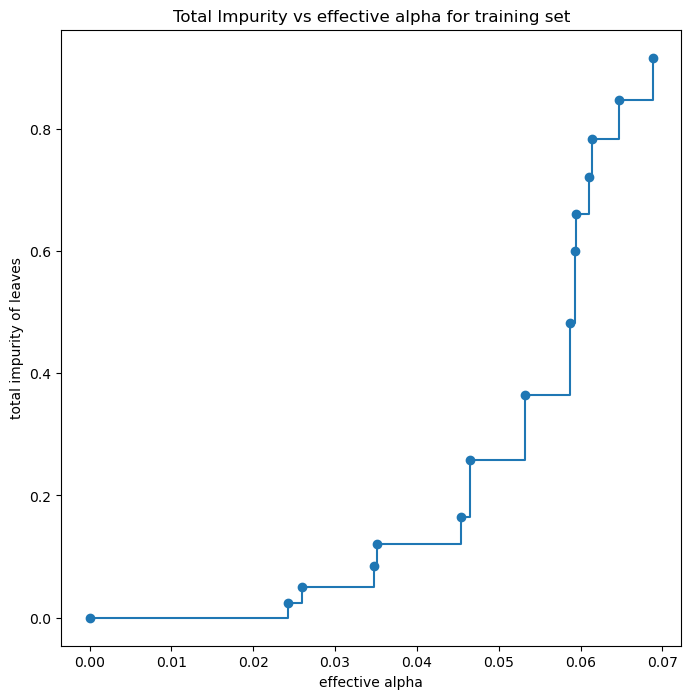

In [78]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

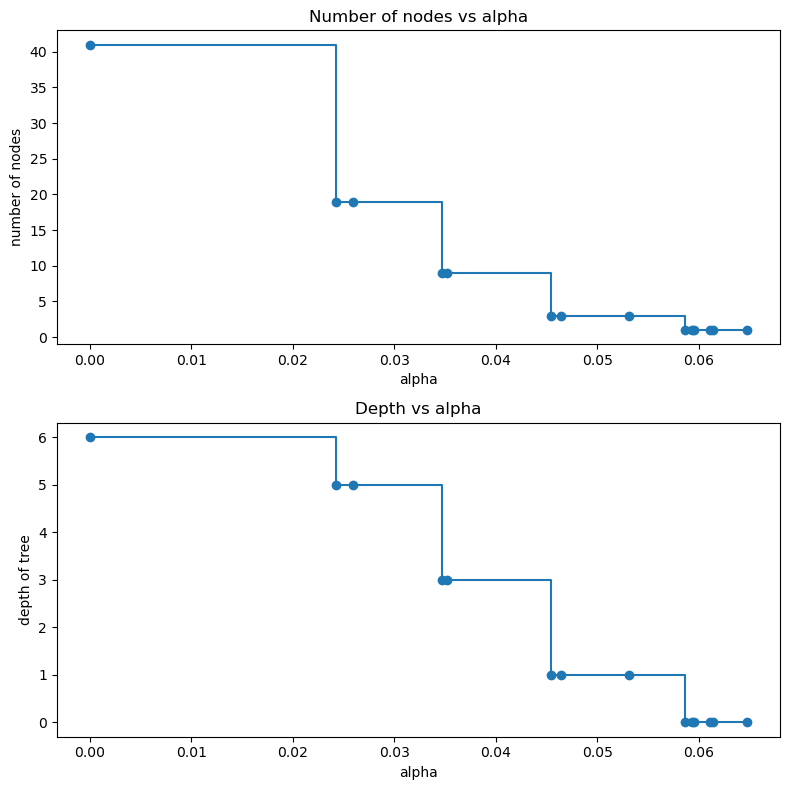

In [83]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

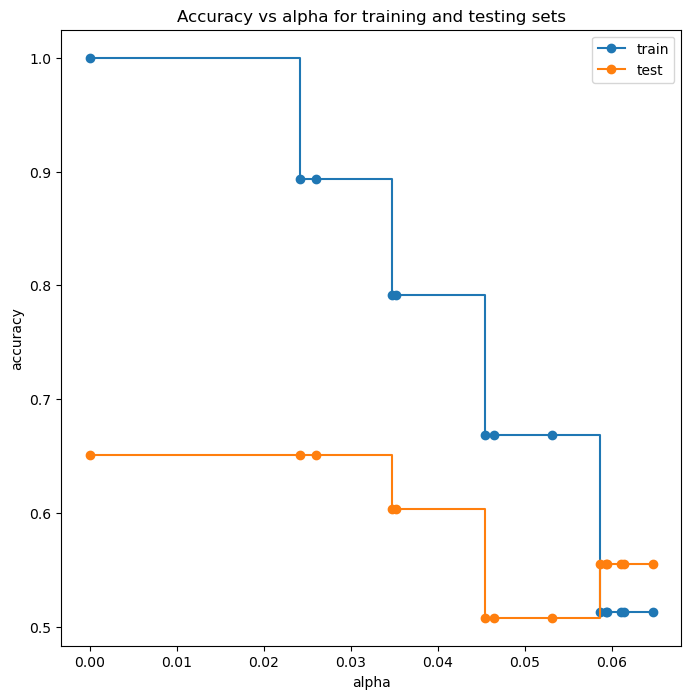

In [86]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
# looking at optimal alpha, seems to be around the 0.058 range

7
Training Accuracy: 1.0
Testing Accuracy: 0.6031746031746031


[Text(0.5, 0.9375, 'x[49] <= 0.534\nentropy = 0.999\nsamples = 187\nvalue = [91, 96]'),
 Text(0.3, 0.8125, 'x[198] <= 0.781\nentropy = 0.924\nsamples = 106\nvalue = [36, 70]'),
 Text(0.16, 0.6875, 'x[160] <= 0.258\nentropy = 0.792\nsamples = 84\nvalue = [20, 64]'),
 Text(0.12, 0.5625, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.2, 0.5625, 'x[41] <= 0.81\nentropy = 0.918\nsamples = 60\nvalue = [20, 40]'),
 Text(0.12, 0.4375, 'x[145] <= 0.39\nentropy = 0.787\nsamples = 51\nvalue = [12, 39]'),
 Text(0.08, 0.3125, 'entropy = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.16, 0.3125, 'x[124] <= 0.586\nentropy = 0.978\nsamples = 29\nvalue = [12, 17]'),
 Text(0.08, 0.1875, 'x[55] <= 0.491\nentropy = 0.863\nsamples = 14\nvalue = [10, 4]'),
 Text(0.04, 0.0625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.12, 0.0625, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.24, 0.1875, 'x[85] <= 0.221\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.2, 0.0625, 'ent

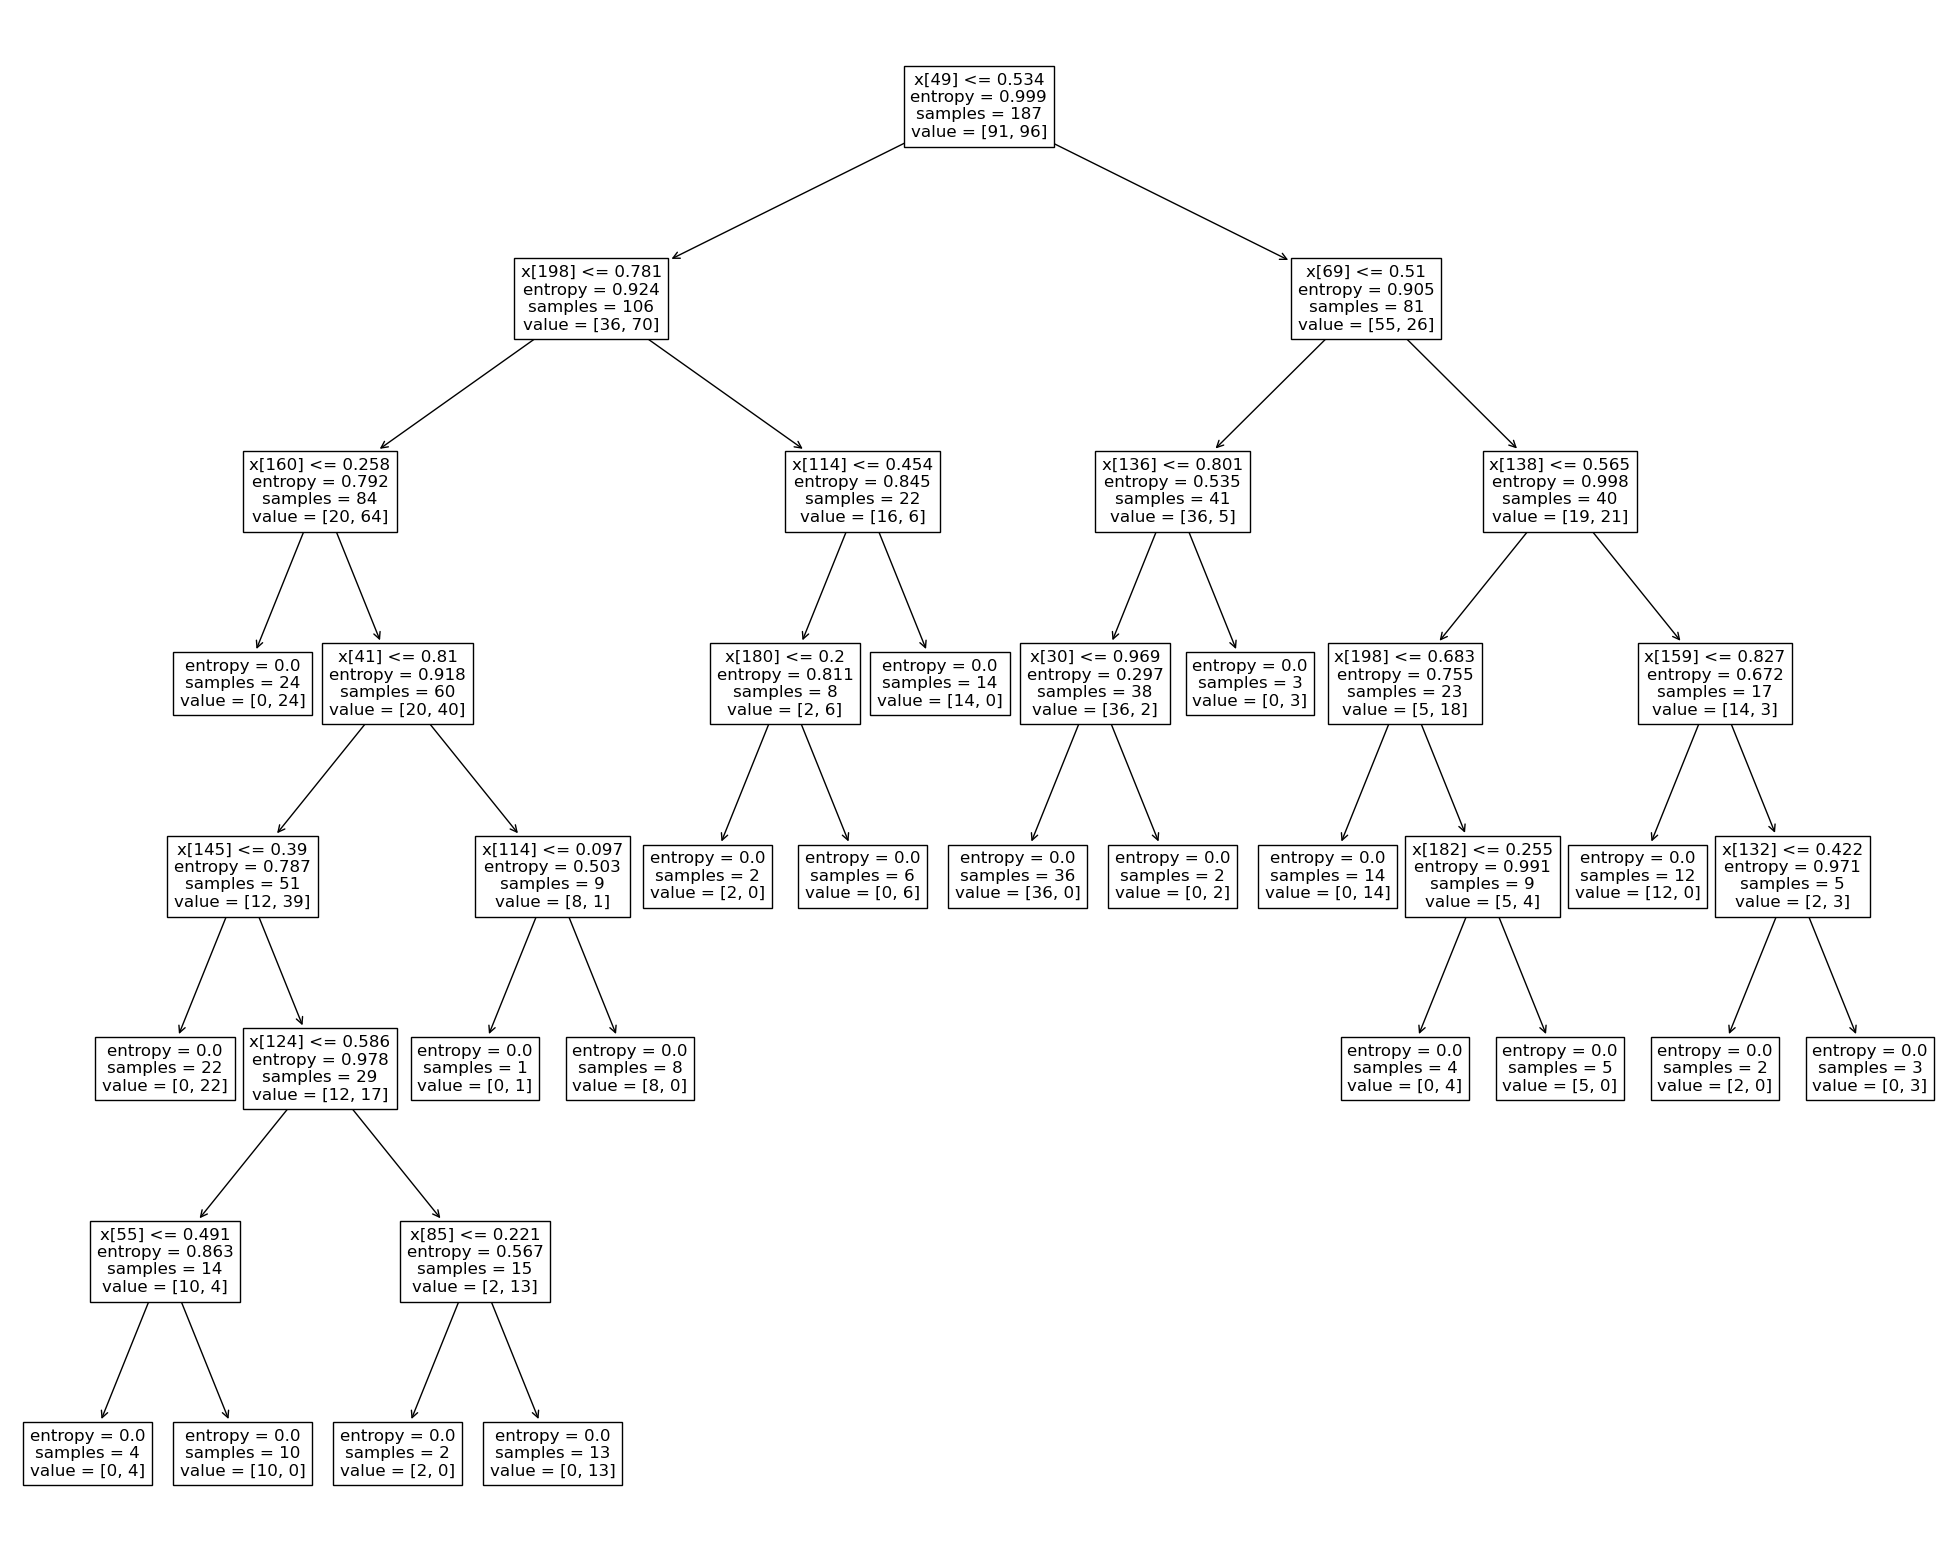

In [96]:
clf_ = DecisionTreeClassifier(ccp_alpha=0.005, criterion="entropy", max_depth=8)
clf_ = clf_.fit(X_train, y_train)
print(clf_.get_depth())
print("Training Accuracy:", clf_.score(X_train, y_train))
print("Testing Accuracy:", clf_.score(X_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf_)

#### Do Modelling Stuff

Make a tree model (of some vareity) and make it fit well. Keep in mind the possibility of your tree overfitting, and think of steps you may need to combat that shoudl it occur. 

In [97]:
# Creating a pipeline based on model from testing
pipeline_steps = [('scaler', StandardScaler()),('DT', DecisionTreeClassifier(ccp_alpha=0.005, criterion="entropy", max_depth=8))]

best = Pipeline(pipeline_steps)

best.fit(X_train, y_train)

best.score(X_test, y_test)

best = best.fit(X_train, y_train)
print("Training Accuracy:", best.score(X_train, y_train))
print("Testing Accuracy:", best.score(X_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666


In [100]:
print(best.score(X_test, y_test))
print(best)

0.6666666666666666
Pipeline(steps=[('scaler', StandardScaler()),
                ('DT',
                 DecisionTreeClassifier(ccp_alpha=0.005, criterion='entropy',
                                        max_depth=8))])


### Finishing

At the conclusion, please name your best model "best". If you look down below in the testing stuff, it should be usable to score as "best". 

You should be able to call it like this and it should work (with whatever data names you have)

In [101]:
print(best.score(X_test, y_test))
print(best)

0.6666666666666666
Pipeline(steps=[('scaler', StandardScaler()),
                ('DT',
                 DecisionTreeClassifier(ccp_alpha=0.005, criterion='entropy',
                                        max_depth=8))])


### Testing

Please leave the stuff below as-is in your file. 

This will take your best model and score it with the test data. If you want to test to make sure that yours works, make a copy of the data file and rename it testing.csv, then make sure this runs ok. I will do the same, but the contents of my test file will be different. 

In [102]:
#Load Test Data
test_df = pd.read_csv("testing.csv")
test_df = test_df.drop(columns={"id"})
#Create tests and score
test_y = np.array(test_df["target"]).reshape(-1,1)
test_X = np.array(test_df.drop(columns={"target"}))

preds = best.predict(test_X)

roc_score = roc_auc_score(test_y, preds)
acc_score = accuracy_score(test_y, preds)

print(roc_score)
print(acc_score)
print(name, np.mean([roc_score, acc_score]))


0.5309542576702131
0.5308860759493671
Jean Encenarial 0.53092016680979


### What Accuracy Changes Were Used

Please list here what you did to try to increase accuracy and/or limit overfitting:
<li>  Prune the depth
<li> Changed the quliaty of a split
<li> Standardize the features of the values
<li> Finding the right alpha for the model
</ul>